In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df2 = pd.read_csv("C:\\Users\\hugoe\\Downloads\\Proyecto_final\\World-happiness-report-2024.csv")
df2

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [3]:
df2.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [4]:
df2.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [6]:
df2.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [7]:
df2_clean = df2.dropna()


In [8]:
# Selecciona solo las columnas numéricas
numerical_columns = df2.select_dtypes(include=["float64", "int64"]).columns

# Imputar los valores nulos con la media de las columnas numéricas
df2[numerical_columns] = df2[numerical_columns].fillna(df2[numerical_columns].mean())

# Verifica que ya no haya valores nulos
df2.isnull().sum()


Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64

In [9]:
df1 = pd.read_csv("C:\\Users\\hugoe\\Downloads\\Proyecto_final\\Insta_limpio.csv")
df1

,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023
0,India,3.924650e+08,33.100000,66.900000,229600000
1,United States,1.726062e+08,55.400000,44.600000,143400000
2,Indonesia,9.018320e+07,54.200000,45.800000,89150000
3,Pakistan,1.859330e+07,35.100000,64.900000,12950000
4,Nigeria,1.263590e+07,46.500000,53.500000,7100000
...,...,...,...,...,...
221,Saint Pierre and Miquelon,8.352472e+06,50.350244,49.650244,1650
222,Montserrat,8.352472e+06,50.350244,49.650244,1300
223,Falkland Islands,8.352472e+06,50.350244,49.650244,1100
224,Tokelau,8.352472e+06,50.350244,49.650244,100


In [10]:
# Renombrar la columna 'Country name' en df2 a 'country' para que coincida con df1
df2.rename(columns={"Country name": "country"}, inplace=True)

# Unir los DataFrames utilizando la columna 'country'
df_unido = pd.merge(df1, df2, on="country", how="inner")

# Mostrar el resultado de la unión
df_unido.head(5)

,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,India,392465000.0,33.1,66.9,229600000,South Asia,4.054,4.123,3.985,1.166,0.653,0.417,0.767,0.174,0.122,0.756
1,United States,172606200.0,55.4,44.6,143400000,North America and ANZ,6.725,6.818,6.631,1.939,1.392,0.542,0.586,0.223,0.169,1.873
2,Indonesia,90183200.0,54.2,45.8,89150000,Southeast Asia,5.568,5.670,5.466,1.361,1.184,0.472,0.779,0.399,0.055,1.318
3,Pakistan,18593301.0,35.1,64.9,12950000,South Asia,4.657,4.779,4.535,1.069,0.600,0.321,0.542,0.144,0.074,1.907
4,Nigeria,12635900.0,46.5,53.5,7100000,Sub-Saharan Africa,4.881,5.018,4.744,1.042,1.075,0.256,0.566,0.201,0.019,1.722


In [11]:
# Eliminar las columnas de df_unido
df_unido = df_unido.drop(columns=["Generosity", "Perceptions of corruption", "Dystopia + residual", "Regional indicator", "Ladder score", "upperwhisker", "lowerwhisker"])

# Mostrar el DataFrame actualizado
df_unido


,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,India,392465000.0,33.1,66.9,229600000,1.166,0.653,0.417,0.767
1,United States,172606200.0,55.4,44.6,143400000,1.939,1.392,0.542,0.586
2,Indonesia,90183200.0,54.2,45.8,89150000,1.361,1.184,0.472,0.779
3,Pakistan,18593301.0,35.1,64.9,12950000,1.069,0.600,0.321,0.542
4,Nigeria,12635900.0,46.5,53.5,7100000,1.042,1.075,0.256,0.566
...,...,...,...,...,...,...,...,...,...
127,Comoros,27001.0,31.9,68.1,21000,0.896,0.328,0.370,0.172
128,Luxembourg,304800.0,53.2,46.8,241400,2.141,1.355,0.708,0.801
129,Montenegro,421100.0,53.7,46.3,350900,1.571,1.318,0.587,0.632
130,Malta,276200.0,49.0,51.0,219700,1.827,1.444,0.707,0.727


In [12]:
df_unido.to_csv("Final_unido.csv", index=False)

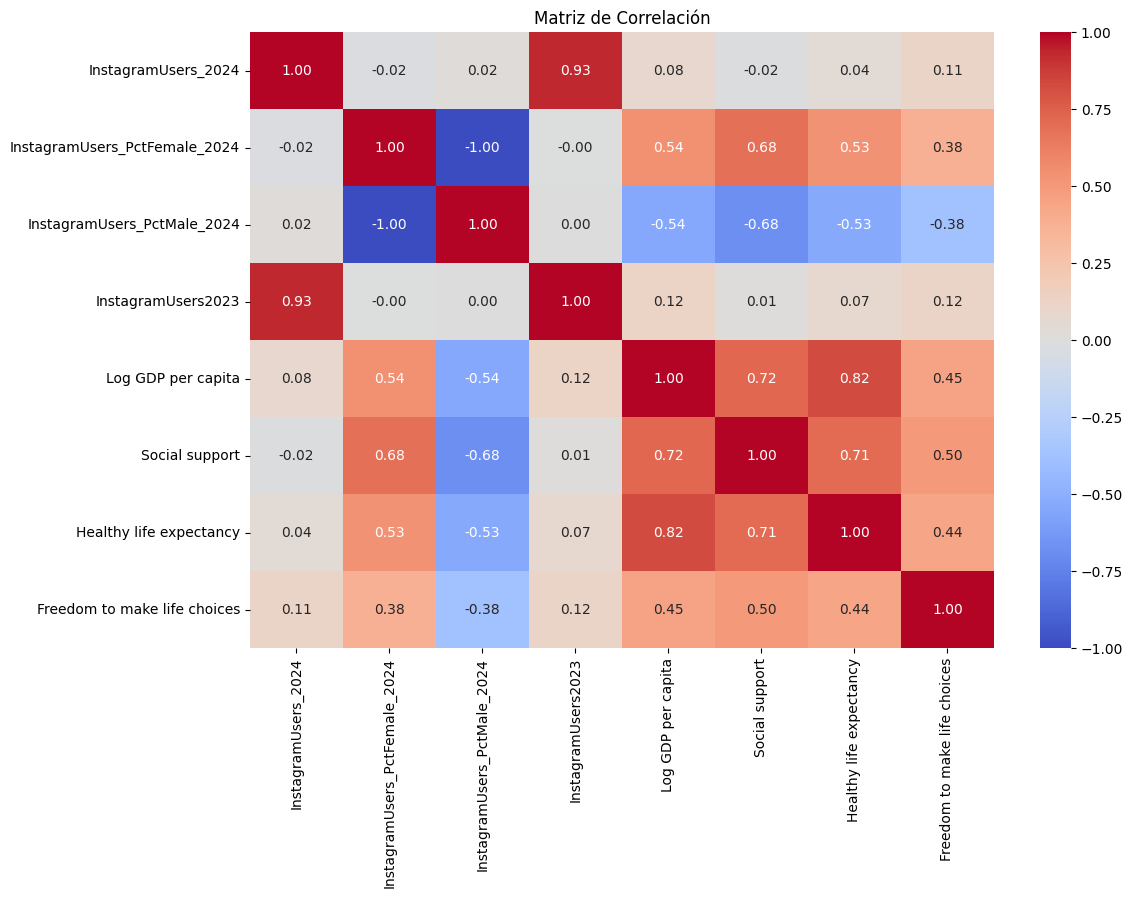

In [13]:
# Seleccionar solo las columnas numéricas
df_numerico = df_unido.select_dtypes(include=["float64", "int64"])

# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = df_numerico.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [14]:
df_unido[df_unido["country"] == "Spain"]

,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
25,Spain,27080600.0,55.3,44.7,21900000,1.766,1.471,0.729,0.619


In [15]:
# Filtrar los datos para Francia, España e Italia
df_seleccionado = df_unido[df_unido["country"].isin(["France", "Spain", "Italy"])]

# Mostrar las primeras filas para asegurarnos de que se haya realizado correctamente el filtrado
df_seleccionado.head()


,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
17,France,29213100.0,55.1,44.9,23750000,1.818,1.348,0.727,0.650
19,Italy,30727000.0,54.0,46.0,26200000,1.800,1.328,0.720,0.513
25,Spain,27080600.0,55.3,44.7,21900000,1.766,1.471,0.729,0.619


In [16]:
for column in df_unido.columns:
    print(f"\n{column} - value counts:")
    print(df_unido[column].value_counts())


country - value counts:
country
India         1
Laos          1
Slovakia      1
Norway        1
Liberia       1
             ..
Ghana         1
Mozambique    1
Malaysia      1
Uzbekistan    1
Iceland       1
Name: count, Length: 132, dtype: int64

InstagramUsers_2024 - value counts:
InstagramUsers_2024
392465000.0    1
584200.0       1
1749600.0      1
2892500.0      1
114000.0       1
              ..
2313700.0      1
637800.0       1
15676300.0     1
9427600.0      1
223300.0       1
Name: count, Length: 132, dtype: int64

InstagramUsers_PctFemale_2024 - value counts:
InstagramUsers_PctFemale_2024
55.8    5
55.4    4
55.1    3
55.6    3
56.2    3
       ..
44.2    1
48.7    1
38.1    1
63.4    1
49.0    1
Name: count, Length: 97, dtype: int64

InstagramUsers_PctMale_2024 - value counts:
InstagramUsers_PctMale_2024
44.2    5
44.6    4
44.9    3
44.4    3
43.8    3
       ..
55.8    1
51.3    1
61.9    1
36.6    1
51.0    1
Name: count, Length: 97, dtype: int64

InstagramUsers2023 - v

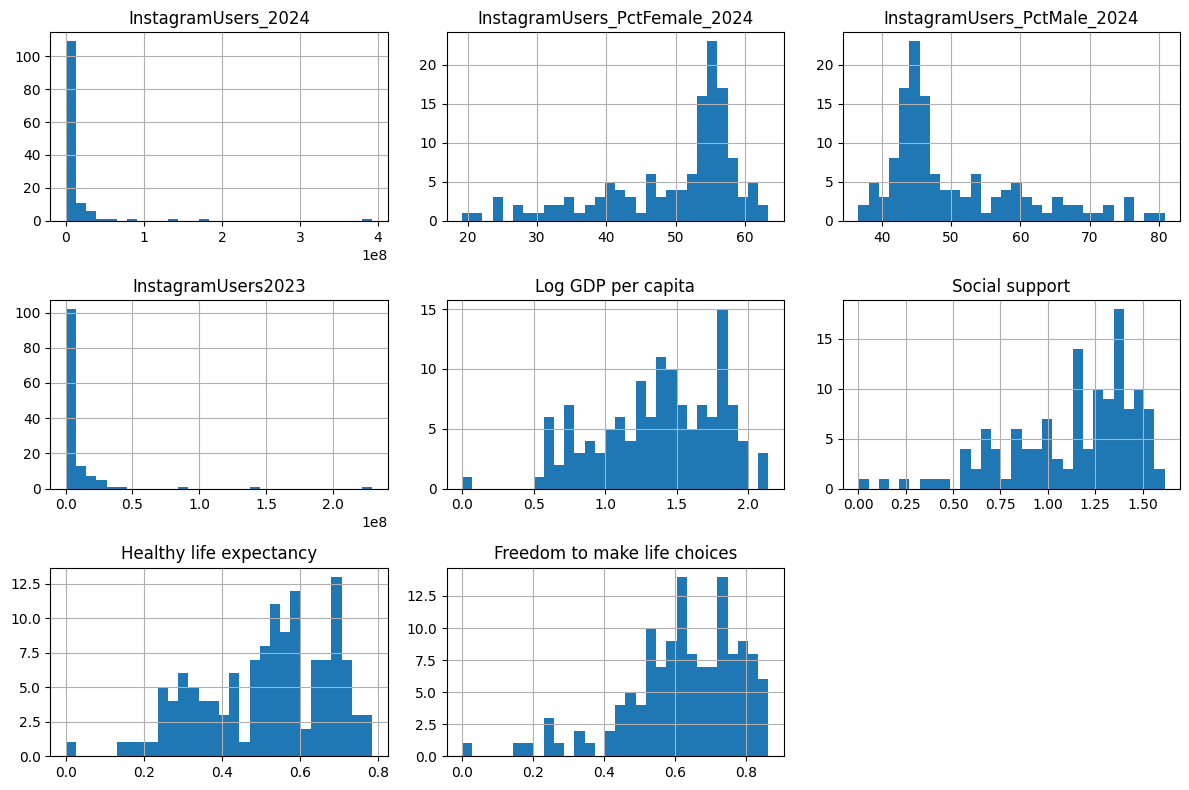

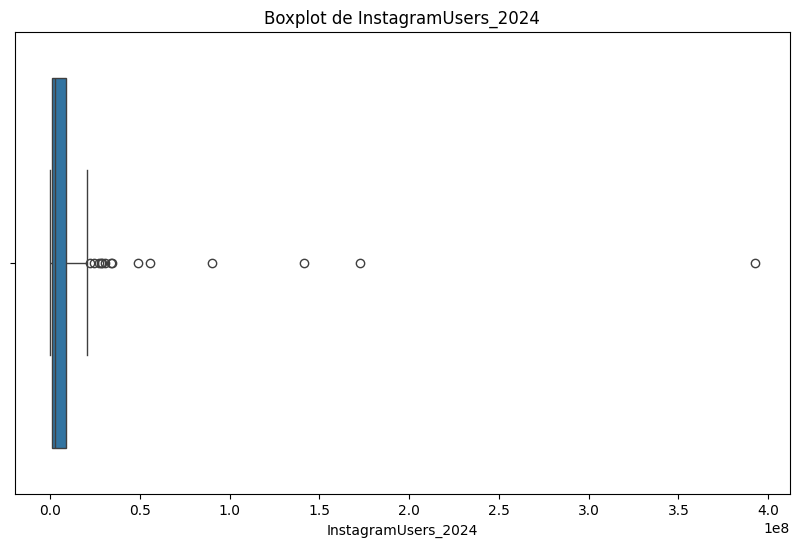

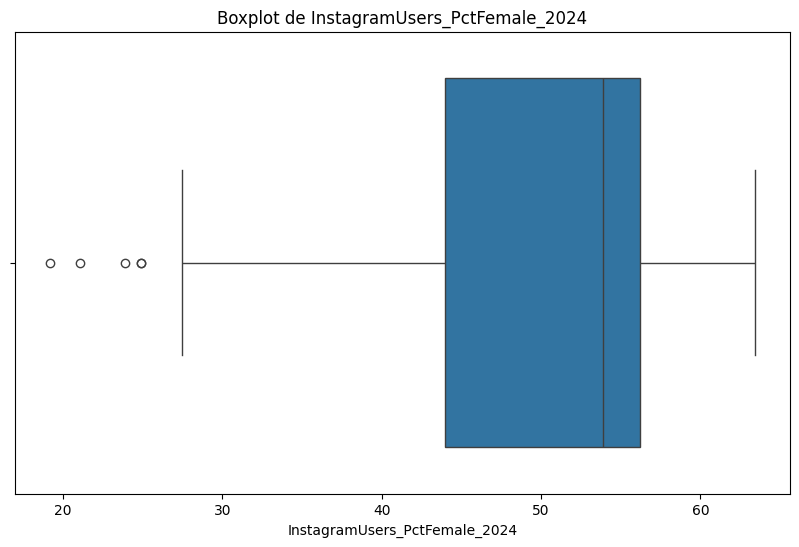

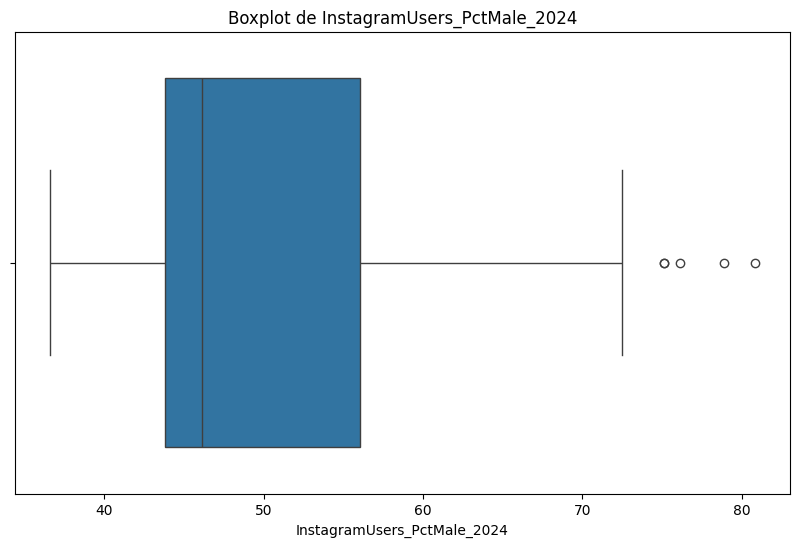

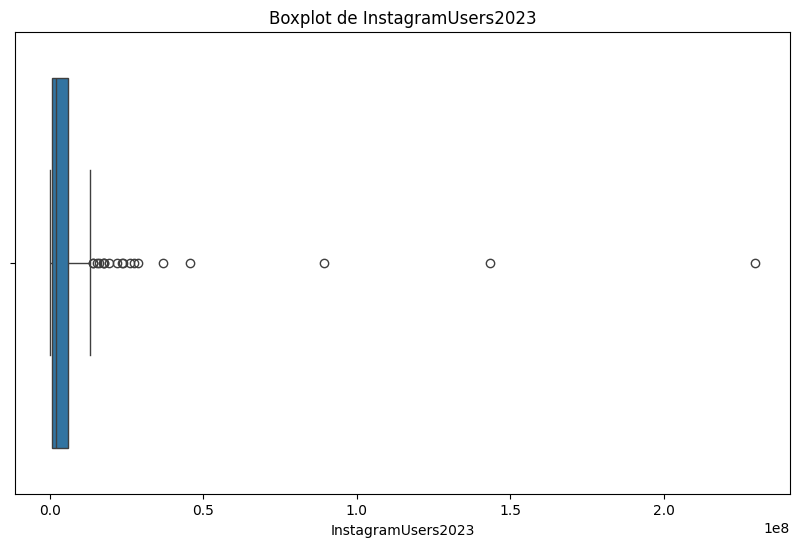

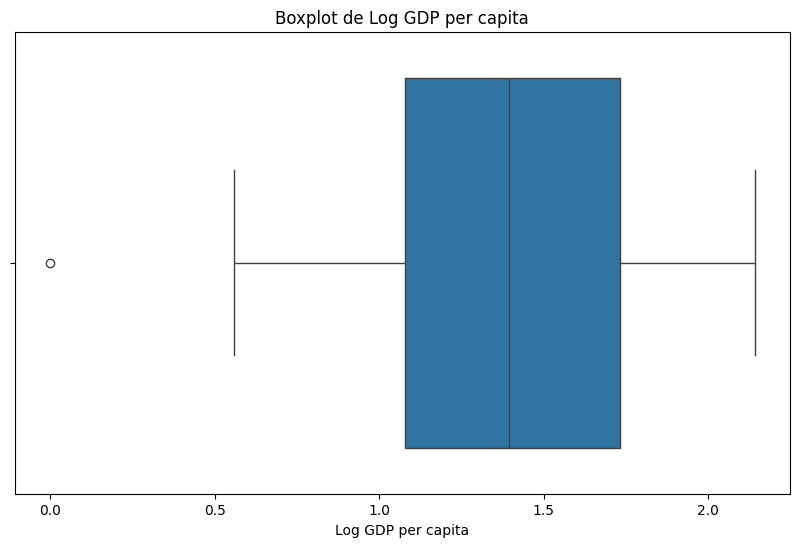

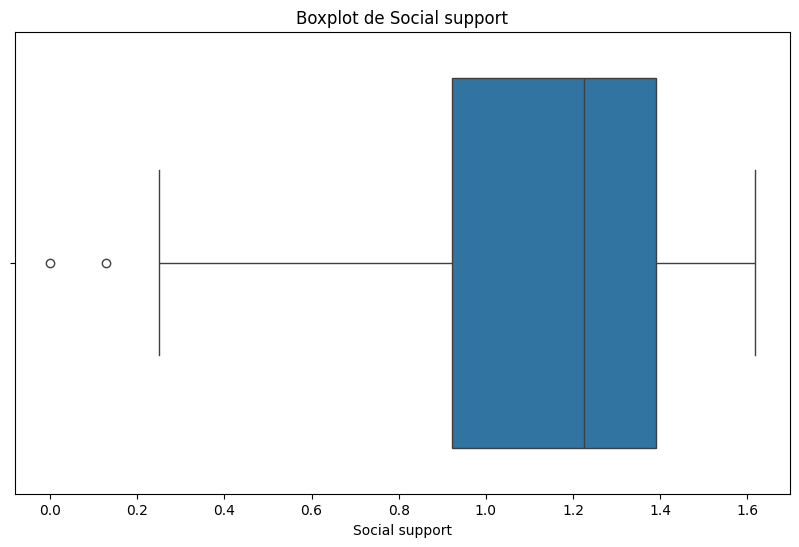

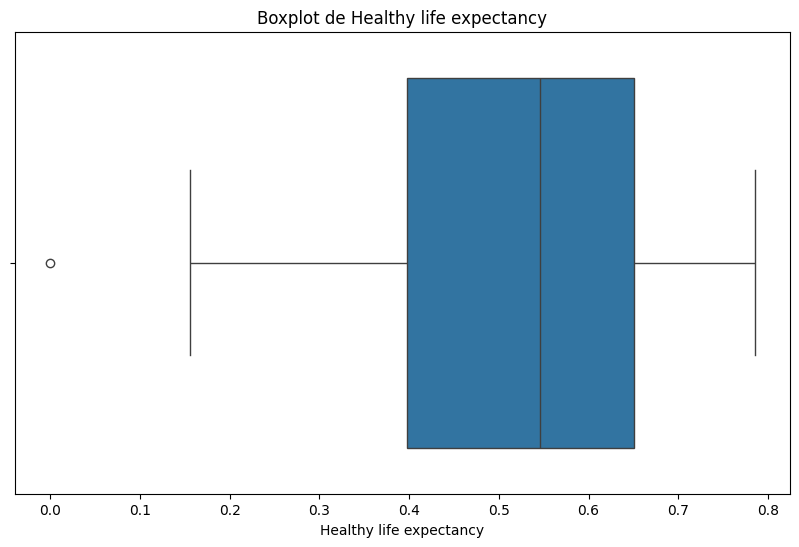

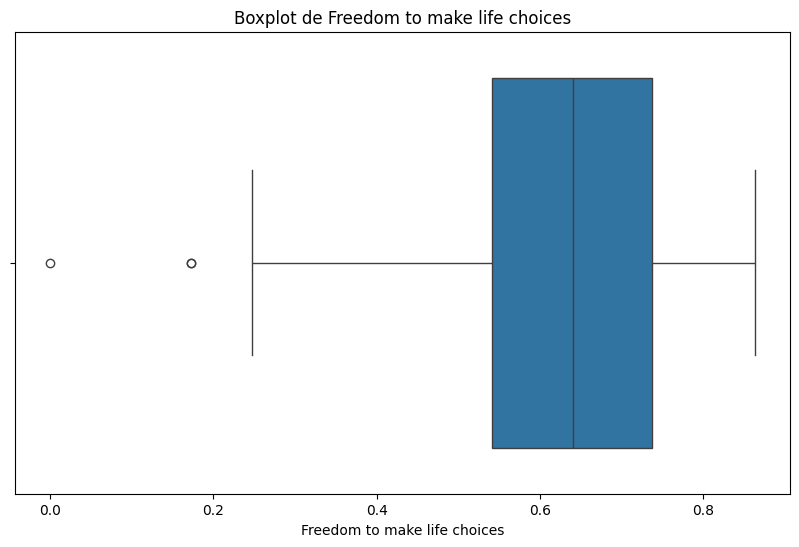

In [17]:
# Histogramas para las variables numéricas
df_unido.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
for column in df_unido.select_dtypes(include=["float64", "int64"]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_unido, x=column)
    plt.title(f'Boxplot de {column}')
    plt.show()

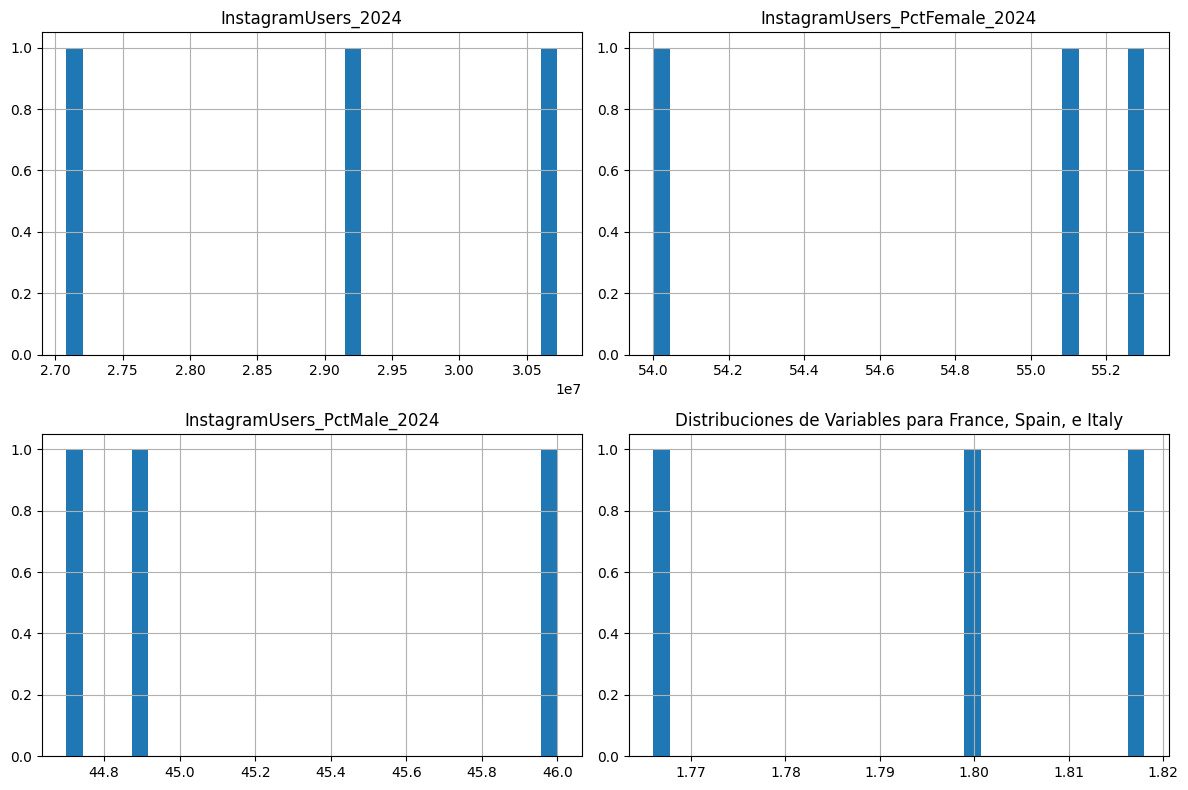

In [18]:
# Graficar las distribuciones de algunas variables para los tres países seleccionados
df_seleccionado[["InstagramUsers_2024", "InstagramUsers_PctFemale_2024", "InstagramUsers_PctMale_2024", "Log GDP per capita"]].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.title("Distribuciones de Variables para France, Spain, e Italy")
plt.show()


C:\Users\hugoe\AppData\Local\Temp\ipykernel_33544\1508344319.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_seleccionado, x="country", y="InstagramUsers_2024", ci=None, palette="viridis")
C:\Users\hugoe\AppData\Local\Temp\ipykernel_33544\1508344319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_seleccionado, x="country", y="InstagramUsers_2024", ci=None, palette="viridis")


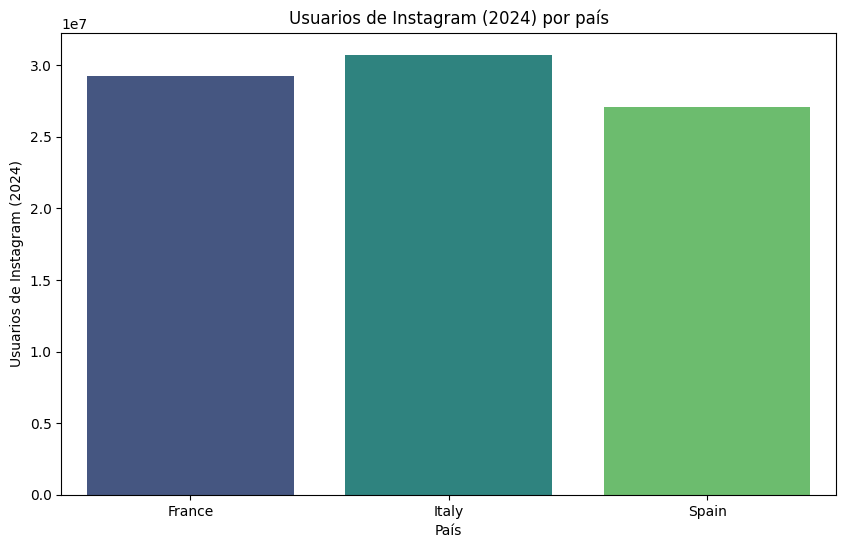

In [19]:
# Gráfico de barras para comparar los usuarios de Instagram en 2024
plt.figure(figsize=(10, 6))
sns.barplot(data=df_seleccionado, x="country", y="InstagramUsers_2024", ci=None, palette="viridis")
plt.title("Usuarios de Instagram (2024) por país")
plt.xlabel("País")
plt.ylabel("Usuarios de Instagram (2024)")
plt.show()


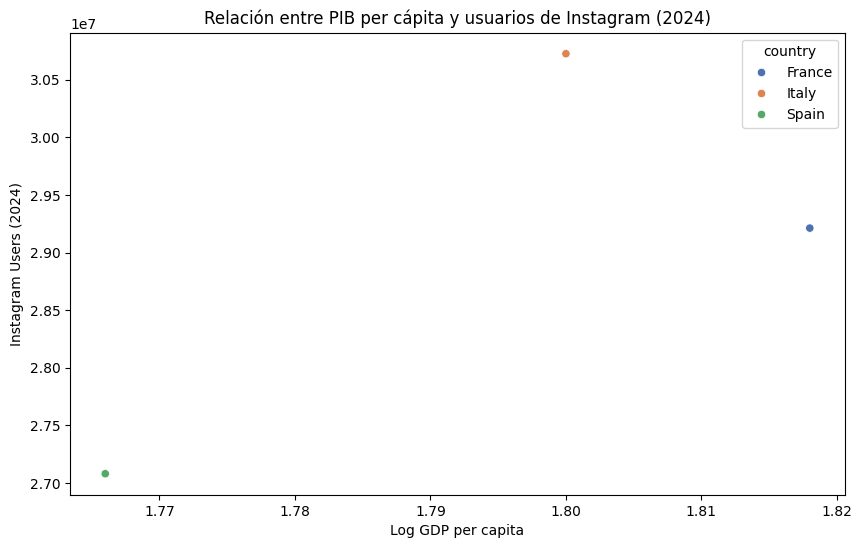

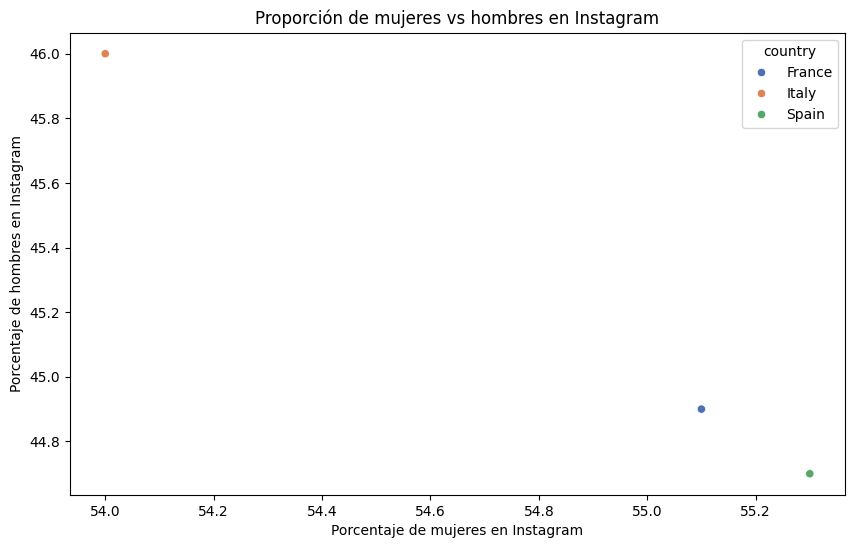

In [20]:
# Relación entre PIB per cápita y usuarios de Instagram para los tres países
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_seleccionado, x="Log GDP per capita", y="InstagramUsers_2024", hue="country", palette="deep")
plt.title("Relación entre PIB per cápita y usuarios de Instagram (2024)")
plt.xlabel("Log GDP per capita")
plt.ylabel("Instagram Users (2024)")
plt.show()

# Relación entre porcentaje de mujeres y hombres en Instagram
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_seleccionado, x="InstagramUsers_PctFemale_2024", y="InstagramUsers_PctMale_2024", hue="country", palette="deep")
plt.title("Proporción de mujeres vs hombres en Instagram")
plt.xlabel("Porcentaje de mujeres en Instagram")
plt.ylabel("Porcentaje de hombres en Instagram")
plt.show()


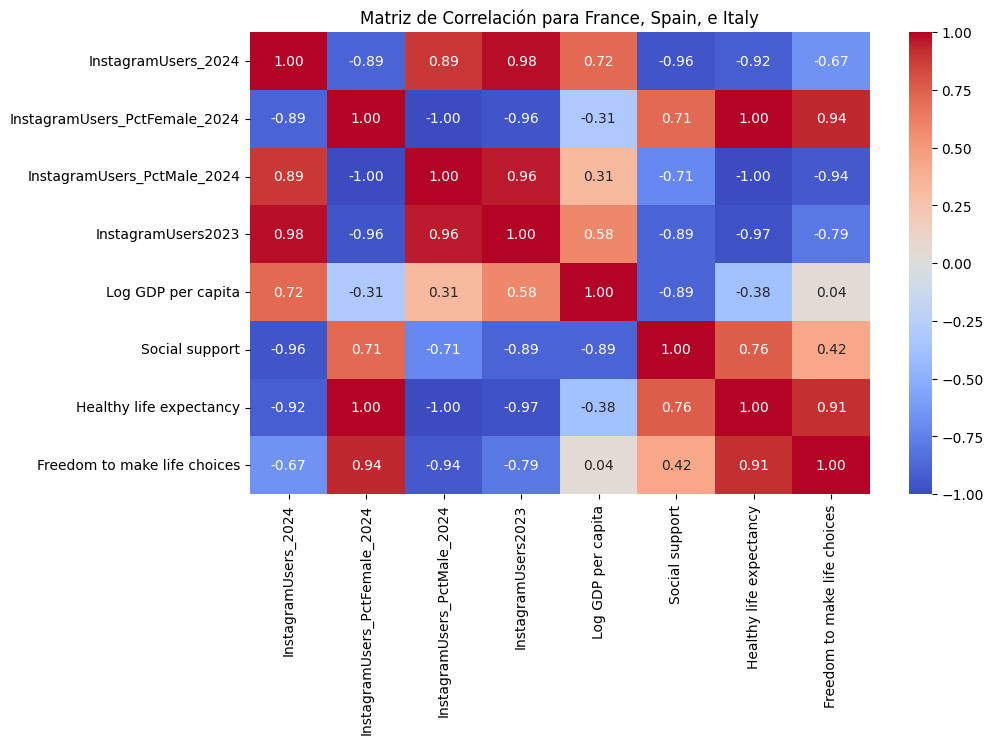

In [21]:
# Seleccionar solo las columnas numéricas
df_seleccionado_numerico = df_seleccionado.select_dtypes(include=["float64", "int64"])

# Calcular la matriz de correlación solo para los datos de los tres países
correlation_matrix_seleccionada = df_seleccionado_numerico.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_seleccionada, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación para France, Spain, e Italy")
plt.show()


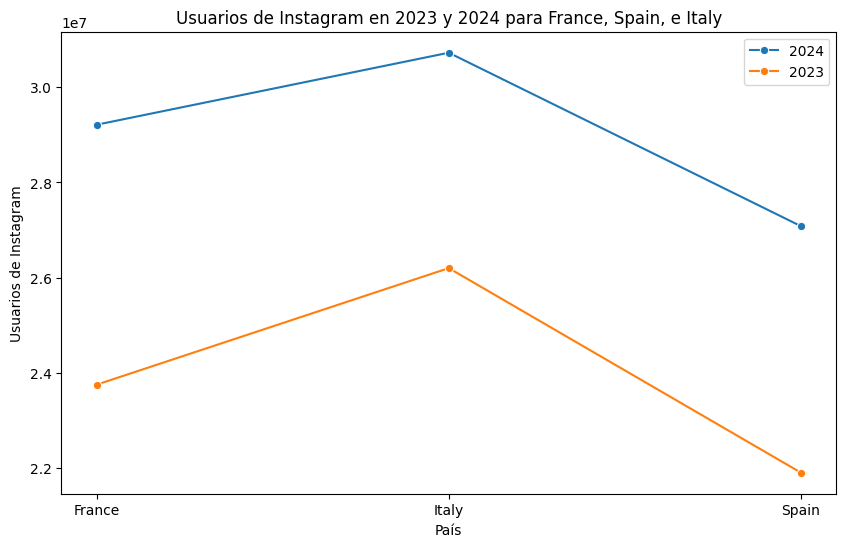

In [22]:
# Comparar usuarios de Instagram en 2023 y 2024 para los tres países
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_seleccionado, x="country", y="InstagramUsers_2024", label="2024", marker="o")
sns.lineplot(data=df_seleccionado, x="country", y="InstagramUsers2023", label="2023", marker="o")
plt.title("Usuarios de Instagram en 2023 y 2024 para France, Spain, e Italy")
plt.xlabel("País")
plt.ylabel("Usuarios de Instagram")
plt.legend()
plt.show()


In [23]:
# Seleccionar solo las columnas numéricas
df_numericas = df_unido.select_dtypes(include=["float64", "int64"])

# Ver qué columnas son numéricas
df_numericas.columns

Index(['InstagramUsers_2024', 'InstagramUsers_PctFemale_2024',
       'InstagramUsers_PctMale_2024', 'InstagramUsers2023',
       'Log GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices'],
      dtype='object')

In [24]:
# Calcular los percentiles Q1 (25%) y Q3 (75%) para las columnas numéricas
Q1 = df_numericas.quantile(0.25)
Q3 = df_numericas.quantile(0.75)
IQR = Q3 - Q1

# Filtrar los datos que están fuera de los límites del IQR (outliers)
df_limpio = df_unido[~((df_unido[df_numericas.columns] < (Q1 - 1.5 * IQR)) | (df_unido[df_numericas.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Ver los datos después de la eliminación de outliers
print(f"Forma original del DataFrame: {df_unido.shape}")
# print(f"Forma después de eliminar outliers: {df_limpio.shape}")

Forma original del DataFrame: (132, 9)


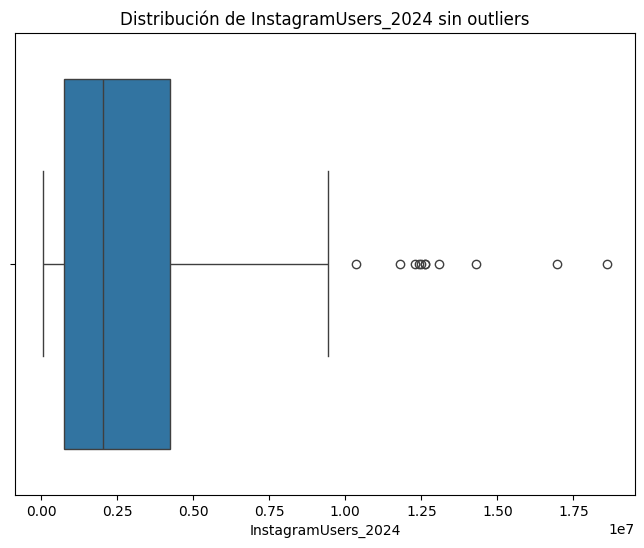

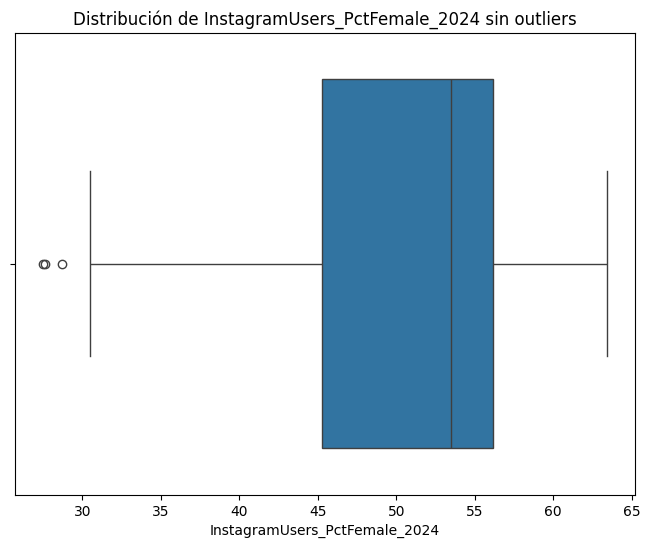

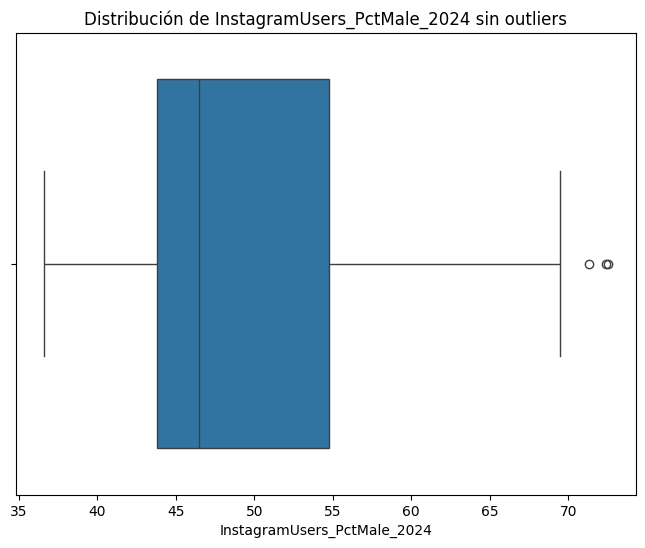

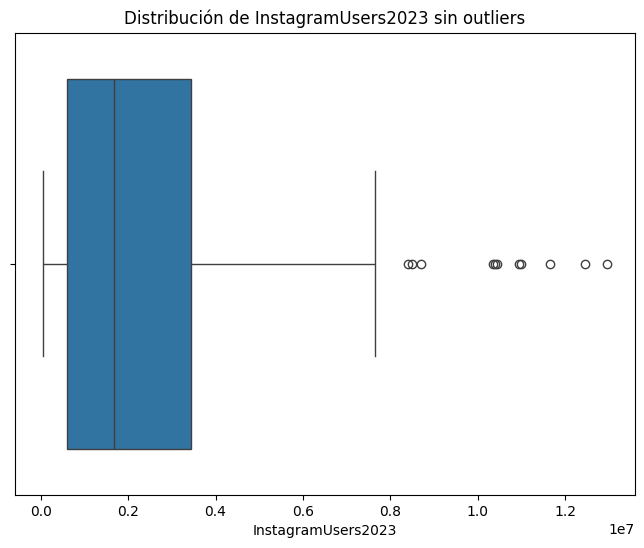

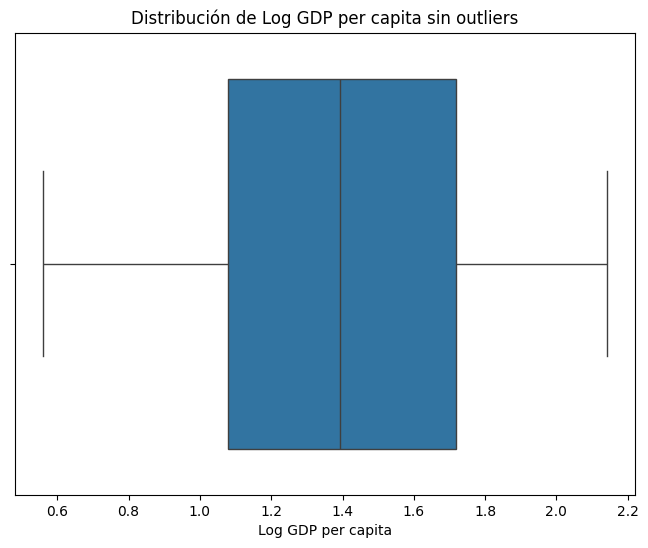

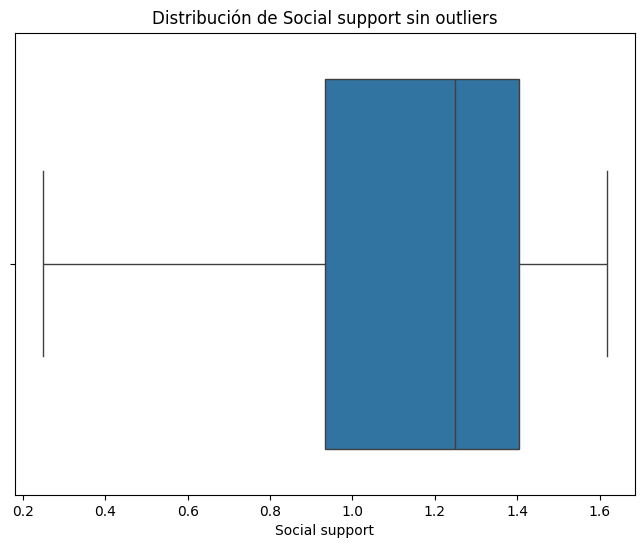

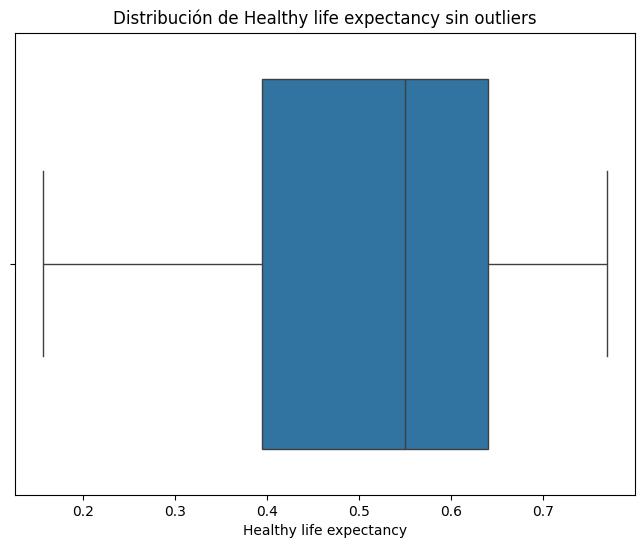

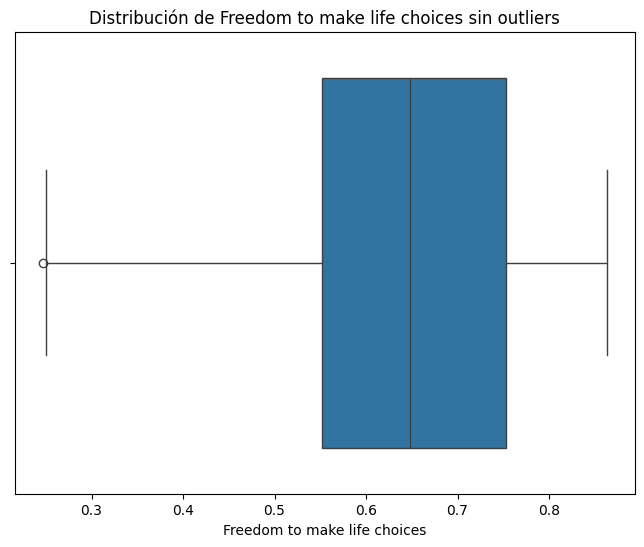

In [25]:
# Graficar boxplots para verificar la eliminación de outliers
for column in df_numericas.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_limpio, x=column)
    plt.title(f"Distribución de {column} sin outliers")
    plt.show()

In [26]:
# Definir las características (X) y la variable objetivo (y)
X = df_limpio.drop(columns=["InstagramUsers_2024"])  # Por ejemplo, predecimos InstagramUsers_2024
y = df_limpio["InstagramUsers_2024"]

# Dividir los datos en conjunto de entrenamiento y prueba (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
df_limpio.columns

Index(['country', 'InstagramUsers_2024', 'InstagramUsers_PctFemale_2024',
       'InstagramUsers_PctMale_2024', 'InstagramUsers2023',
       'Log GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices'],
      dtype='object')

In [28]:
# Definir las características (X) y la variable objetivo (y)
X = df_limpio.drop(columns=["InstagramUsers_2024"] + [col for col in df_limpio.columns if col.startswith("country_")])  # Eliminamos "InstagramUsers_2024" y las columnas de países
y = df_limpio["InstagramUsers_2024"]  # La variable objetivo sigue siendo "InstagramUsers_2024"


In [29]:
# Eliminar la columna "country" que no es relevante para el modelo
X = df_limpio.drop(columns=["InstagramUsers_2024", "country"] + [col for col in df_limpio.columns if col.startswith("country_")])

# Definir la variable objetivo (y)
y = df_limpio["InstagramUsers_2024"]

# Verificar los tipos de datos
print(X.dtypes)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


InstagramUsers_PctFemale_2024    float64
InstagramUsers_PctMale_2024      float64
InstagramUsers2023                 int64
Log GDP per capita               float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
dtype: object
Mean Squared Error: 1677143896272.269
R2 Score: 0.9349238127222071


In [30]:
df_limpio.columns

Index(['country', 'InstagramUsers_2024', 'InstagramUsers_PctFemale_2024',
       'InstagramUsers_PctMale_2024', 'InstagramUsers2023',
       'Log GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices'],
      dtype='object')

In [31]:
y_pred

array([13999006.3340843 ,   243403.72431947,  3406310.4749264 ,
        6673297.09300098,  3515992.38455968,  2858919.04702952,
         725864.26149124,  1641325.03040171, 10690371.93920805,
       17541244.82875687, 10781994.83039432,  6227701.64156702,
        -362436.68382755,   953916.70853765,  1241460.9026211 ,
       13812060.44516909,  2245749.9478711 ,  3752463.20036819,
       13079386.48354836,  2099158.43010938,   270245.06305171])

Mean Absolute Error: 647264.6898249055


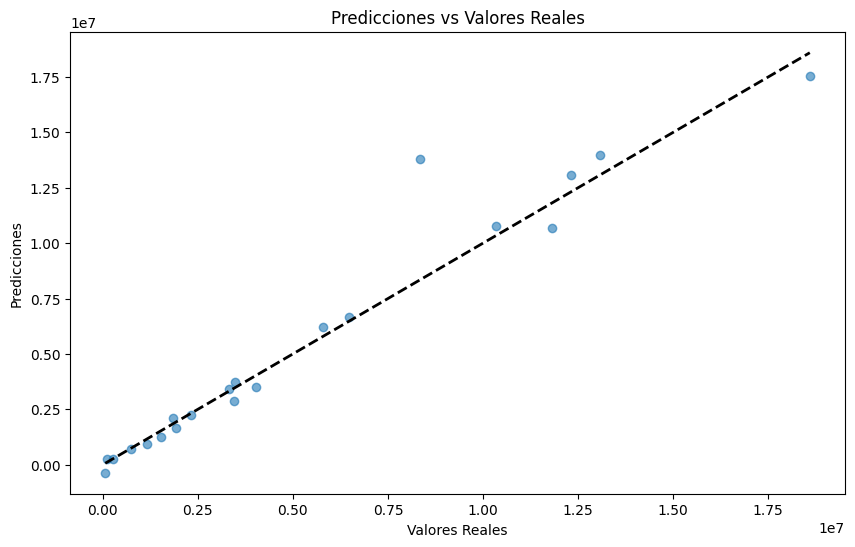

In [32]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--k", lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()


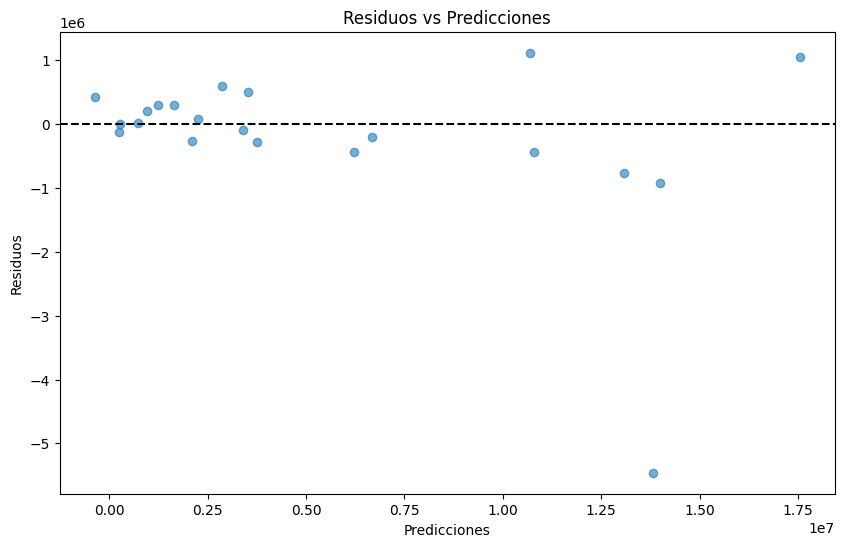

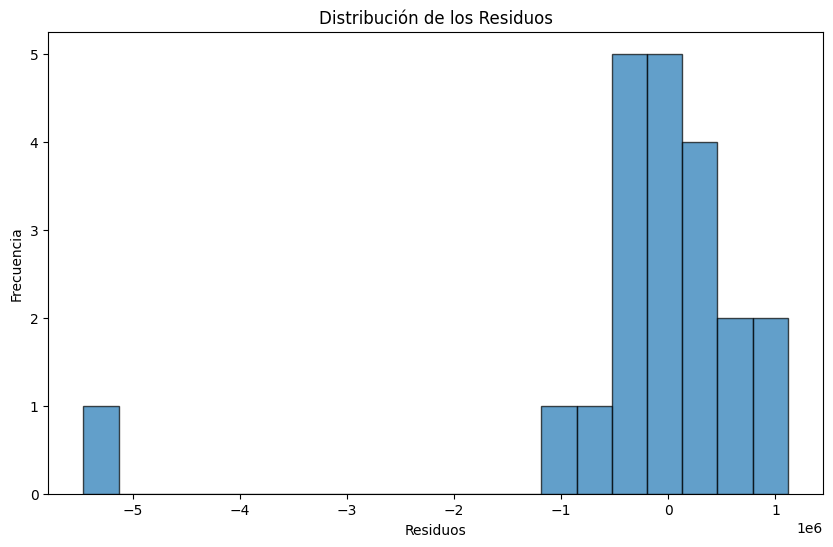

In [33]:
# Residuos (diferencia entre valores reales y predicciones)
residuos = y_test - y_pred

# Gráfica de residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.6)
plt.axhline(y=0, color="k", linestyle="--")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()

# Histogramas de los residuos para ver su distribución
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos")
plt.show()


In [34]:

# Crear un modelo Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Evaluar el modelo Ridge
print(f"Ridge R2 Score: {r2_score(y_test, ridge_pred)}")

# Crear un modelo Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Evaluar el modelo Lasso
print(f"Lasso R2 Score: {r2_score(y_test, lasso_pred)}")


Ridge R2 Score: 0.9375593547812825
Lasso R2 Score: 0.9349240979178719


In [35]:


# Crear un modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluar el modelo Random Forest
print(f"Random Forest R2 Score: {r2_score(y_test, rf_pred)}")


Random Forest R2 Score: 0.9054460307368939


In [36]:
# Coeficientes del modelo de regresión lineal
coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Coeficiente"])
coef_df.sort_values(by="Coeficiente", ascending=False)

,Coeficiente
Freedom to make life choices,1.136227e+06
Social support,4.788245e+05
InstagramUsers_PctMale_2024,2.235228e+04
InstagramUsers2023,1.313834e+00
InstagramUsers_PctFemale_2024,-2.235228e+04
Log GDP per capita,-6.767410e+04
Healthy life expectancy,-1.262028e+06


In [37]:
# Eliminar las columnas de df_unido
df_destruido = df_limpio.drop(columns=["InstagramUsers_PctFemale_2024", "InstagramUsers_PctMale_2024", "InstagramUsers2023", "Log GDP per capita", "Social support", "Healthy life expectancy"])

# Mostrar el DataFrame actualizado
df_destruido


,country,InstagramUsers_2024,Freedom to make life choices
3,Pakistan,1.859330e+07,0.542
4,Nigeria,1.263590e+07,0.566
6,Bangladesh,7.196900e+06,0.775
7,Ethiopia,1.105800e+06,0.441
12,Vietnam,8.352472e+06,0.843
...,...,...,...
126,Eswatini,6.420000e+04,0.284
128,Luxembourg,3.048000e+05,0.801
129,Montenegro,4.211000e+05,0.632
130,Malta,2.762000e+05,0.727


In [38]:
# Verifica las primeras filas del DataFrame
df_destruido.head()


,country,InstagramUsers_2024,Freedom to make life choices
3,Pakistan,1.859330e+07,0.542
4,Nigeria,1.263590e+07,0.566
6,Bangladesh,7.196900e+06,0.775
7,Ethiopia,1.105800e+06,0.441
12,Vietnam,8.352472e+06,0.843


In [39]:
# Verifica el tamaño y las estadísticas descriptivas
df_destruido.describe().round()

,InstagramUsers_2024,Freedom to make life choices
count,102.0,102.0
mean,3568557.0,1.0
std,4106675.0,0.0
min,64200.0,0.0
25%,741250.0,1.0
50%,2042700.0,1.0
75%,4245450.0,1.0
max,18593301.0,1.0


In [40]:
# Comprobar los tipos de datos
df_destruido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 3 to 131
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       102 non-null    object 
 1   InstagramUsers_2024           102 non-null    float64
 2   Freedom to make life choices  102 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.2+ KB


In [41]:
df_destruido.isnull().sum()

country                         0
InstagramUsers_2024             0
Freedom to make life choices    0
dtype: int64

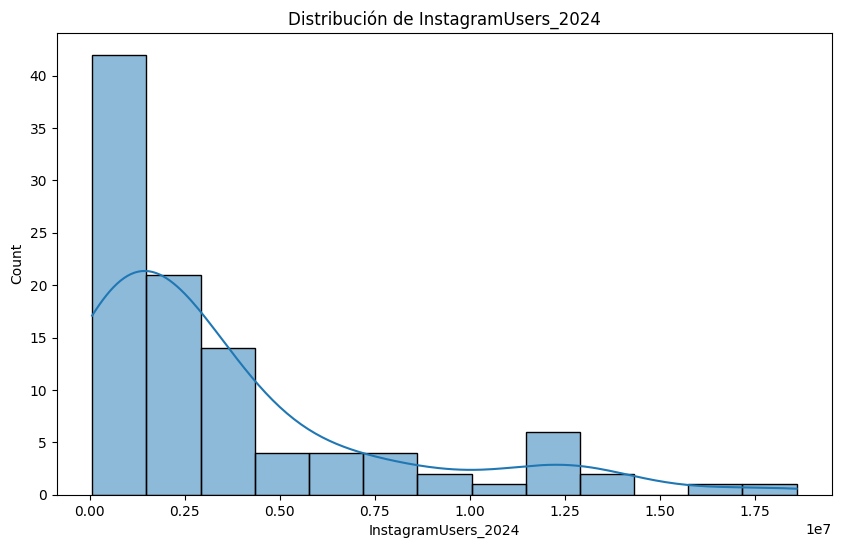

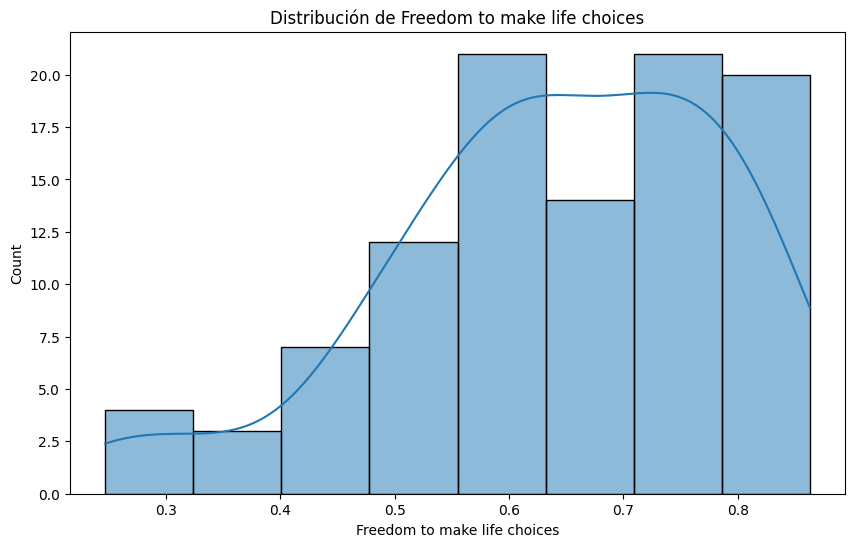

In [42]:
# Histograma de InstagramUsers_2024
plt.figure(figsize=(10,6))
sns.histplot(df_destruido["InstagramUsers_2024"], kde=True)
plt.title("Distribución de InstagramUsers_2024")
plt.show()

# Histograma de Freedom to make life choices
plt.figure(figsize=(10,6))
sns.histplot(df_destruido["Freedom to make life choices"], kde=True)
plt.title("Distribución de Freedom to make life choices")
plt.show()


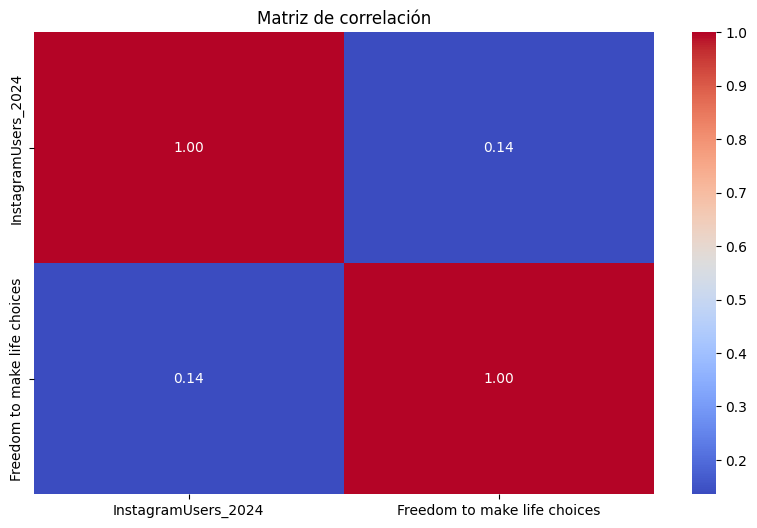

In [43]:
# Seleccionar solo las columnas numéricas
df_numerico = df_destruido.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


In [44]:
# Preparar los datos para entrenamiento
X = df_destruido[["Freedom to make life choices"]]  # Variables predictoras
y = df_destruido["InstagramUsers_2024"]  # Variable objetivo

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 34347772544008.26


C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


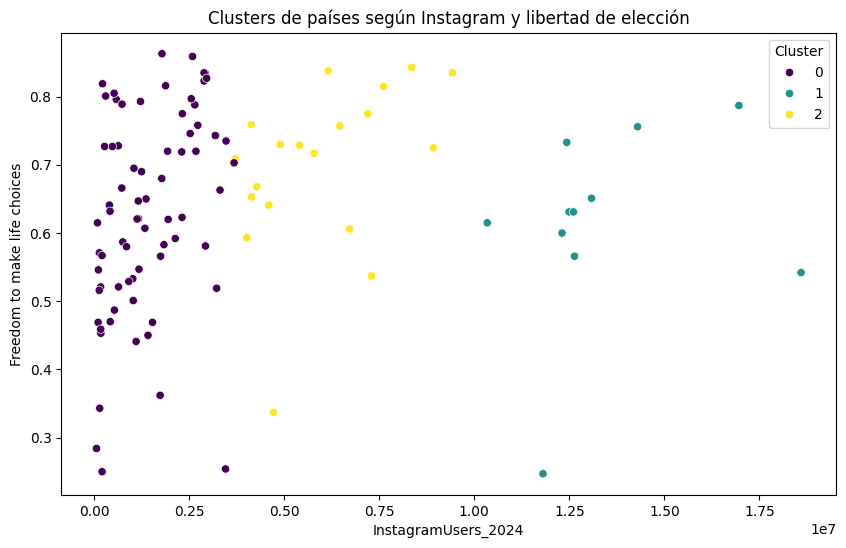

In [45]:
# Seleccionamos las columnas para clustering
X_cluster = df_destruido[["InstagramUsers_2024", "Freedom to make life choices"]]

# Aplicamos K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustamos el modelo y predecimos los clusters
df_destruido["Cluster"] = kmeans.fit_predict(X_cluster)

# Visualizar los clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x="InstagramUsers_2024", y="Freedom to make life choices", hue="Cluster", data=df_destruido, palette="viridis")
plt.title("Clusters de países según Instagram y libertad de elección")
plt.show()


In [46]:
cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")

array([-5.66190261e+13, -1.90799230e+13, -3.93086855e+12, -5.08235339e+12,
       -1.31819164e+13])

In [47]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = df_destruido[["Freedom to make life choices"]]
y = df_destruido["InstagramUsers_2024"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a comparar
models = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Evaluar los modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluar el rendimiento
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "R²": r2}

# Convertir a DataFrame para comparar
results_df = pd.DataFrame(results).T
print(results_df)


                            MAE           MSE        R²
Regresión Lineal   4.007937e+06  3.434777e+13 -0.332755
Árbol de Decisión  4.200256e+06  3.333440e+13 -0.293434
Random Forest      4.319109e+06  3.400336e+13 -0.319391


In [48]:
silhouette_avg = silhouette_score(X_cluster, df_destruido["Cluster"])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.646858384338243


C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

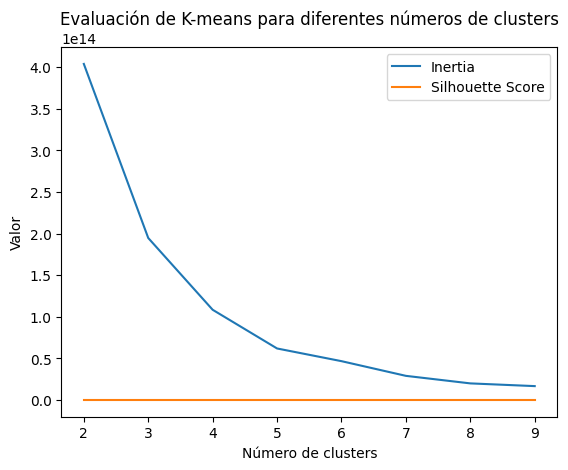

In [49]:
# Probar con diferentes números de clusters
inertia = []
silhouette_scores = []

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_cluster)
    
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_cluster, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Graficar resultados
plt.plot(range(2, 10), inertia, label="Inertia")
plt.plot(range(2, 10), silhouette_scores, label="Silhouette Score")
plt.xlabel("Número de clusters")
plt.ylabel("Valor")
plt.legend()
plt.title("Evaluación de K-means para diferentes números de clusters")
plt.show()


In [50]:
# Agrupar por cluster y hacer regresión para cada grupo
for cluster in df_destruido["Cluster"].unique():
    cluster_data = df_destruido[df_destruido["Cluster"] == cluster]
    X_cluster = cluster_data[["Freedom to make life choices"]]
    y_cluster = cluster_data["InstagramUsers_2024"]
    
    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    
    # Aplicar regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    print(f"Cluster {cluster}:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R²: {r2_score(y_test, y_pred)}\n")


Cluster 1:
MAE: 2685819.998525024
MSE: 13030134048684.445
R²: -0.5884981915800855

Cluster 2:
MAE: 1345895.5799803713
MSE: 1930313551983.4644
R²: 0.33102465085206123

Cluster 0:
MAE: 722196.8115523417
MSE: 675023016995.2188
R²: 0.2339232326266485



Cluster 1:
MAE: 2,685,819.99 — Hay un error medio de alrededor de 2.7 millones entre las predicciones y los valores reales.
MSE: 13,030,134,048,684.45 — El MSE es muy alto, lo que indica que hay errores grandes en algunas predicciones.
R²: -0.588 — Un valor negativo de R² significa que el modelo está haciendo predicciones peores que simplemente tomar la media de los valores reales. Esto indica que la regresión no se ajusta bien a este cluster.




Cluster 2:
MAE: 1,345,895.57 — El error medio es menor en comparación con el Cluster 1.
MSE: 1,930,313,551,983.46 — A pesar de ser menor que en el Cluster 1, el MSE sigue siendo relativamente grande, lo que sugiere que hay errores considerables.
R²: 0.331 — Un valor de R² de 0.33 indica que el modelo explica aproximadamente el 33% de la variabilidad en los datos. Aunque es mejor que en el Cluster 1, sigue siendo un ajuste moderado.




Cluster 0:
MAE: 722,196.81 — El error medio es aún menor que en los otros clusters.
MSE: 675,023,016,995.22 — El MSE es mucho más bajo en comparación con los otros clusters, lo que sugiere que las predicciones son más precisas.
R²: 0.234 — El R² es bajo, pero sigue siendo más alto que en los clusters anteriores. El modelo está explicando un 23% de la variabilidad de los datos en este cluster.


Conclusión:
Los resultados muestran que el modelo de regresión lineal no está funcionando muy bien en ninguno de los clusters, ya que el R² es bajo o negativo. Esto indica que el modelo no es adecuado para predecir InstagramUsers_2024 en función de Freedom to make life choices en estos grupos.

Cluster 0 tiene el mejor rendimiento en términos de MAE y MSE, aunque su R² aún es bajo, lo que sugiere que puede ser un grupo donde la relación entre las variables es algo más predecible.

Cluster 1 tiene el peor rendimiento con un R² negativo, lo que indica que la regresión no es útil para ese grupo.

In [53]:
df_destruido.to_csv("Final_tableau_limpio.csv", index=False)